# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Observations:
    #1. The scatter plot for Max temperature vs Latitude in the Northern Hemisphere indicates a strong negative correlation, with a coefficient of -0.81. We can infer that temperature is inversely related to latitude, whereby temperature falls as latitude increases.
    #2. A pearson's correlation coefficient of -0.65 indicates that over 60% of the observed variation in the dependent variable (Max Temperature) can be explained by the independent variable (Latitude).
    #3. When comparing a count of the number of cities sampled between the Northern and Southern Hemispheres, it appears the number of cities sampled from the Southern Hemisphere were significantly less (190 vs. 376). This apparent disproportion can be explained by the fact that 68% of the Earth's land mass exists in the Northern Hemisphere.  

In [109]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [254]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
analysis_date = datetime.date(datetime.now())
import scipy.stats as st
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [169]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [214]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

countries = []
city_list = []
lat = []
long = []
date = []
temp_high = []
temp_low = []
wind_speed = []
humidity = []
cloud_cover = []

counter = 1

for city in cities:
    try:
        city_url = query_url + city.replace(" ","+")
        city_response = requests.get(city_url)
        city_response.raise_for_status()
        response = city_response.json()
        print(f"Processing Record # {counter} | {city}")
        countries.append(response['sys']['country'])
        city_list.append(city)
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        date.append(response['dt'])
        temp_high.append(response['main']['temp_max'])
        temp_low.append(response['main']['temp_min'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        cloud_cover.append(response['clouds']['all'])
        
    except requests.HTTPError as exception:
        print("City not found. Skipping request.")
    counter += 1
print("Data API Retrieval Complete")
        


Processing Record # 1 | aberdeen
Processing Record # 2 | albany
Processing Record # 3 | padang
Processing Record # 4 | igarka
Processing Record # 5 | ossora
Processing Record # 6 | college
Processing Record # 7 | hilo
Processing Record # 8 | ancud
Processing Record # 9 | mahebourg
Processing Record # 10 | jardim de piranhas
Processing Record # 11 | vaini
Processing Record # 12 | sehithwa
Processing Record # 13 | port alfred
Processing Record # 14 | biak
Processing Record # 15 | tiksi
Processing Record # 16 | kapaa
Processing Record # 17 | avera
Processing Record # 18 | bluff
Processing Record # 19 | kajaani
Processing Record # 20 | ushuaia
City not found. Skipping request.
Processing Record # 22 | thompson
Processing Record # 23 | busselton
Processing Record # 24 | along
Processing Record # 25 | vanavara
Processing Record # 26 | dudinka
Processing Record # 27 | hambantota
Processing Record # 28 | buala
Processing Record # 29 | atuona
Processing Record # 30 | ribeira grande
Processing R

Processing Record # 237 | minsk
Processing Record # 238 | nouadhibou
Processing Record # 239 | venkatagiri
Processing Record # 240 | bubaque
Processing Record # 241 | tuktoyaktuk
Processing Record # 242 | puerto el triunfo
Processing Record # 243 | puerto del rosario
Processing Record # 244 | tecoanapa
Processing Record # 245 | srednekolymsk
City not found. Skipping request.
City not found. Skipping request.
Processing Record # 248 | camargo
Processing Record # 249 | bathsheba
Processing Record # 250 | sovetskiy
Processing Record # 251 | ljungby
City not found. Skipping request.
Processing Record # 253 | ponta pora
Processing Record # 254 | clarence town
Processing Record # 255 | palauig
Processing Record # 256 | rocha
Processing Record # 257 | hoquiam
Processing Record # 258 | hualmay
Processing Record # 259 | taoudenni
Processing Record # 260 | waverly
City not found. Skipping request.
Processing Record # 262 | saint george
Processing Record # 263 | dikson
Processing Record # 264 | c

Processing Record # 471 | nagar
Processing Record # 472 | mirnyy
Processing Record # 473 | jiaohe
Processing Record # 474 | lagoa
Processing Record # 475 | urubicha
Processing Record # 476 | bonito
Processing Record # 477 | wuwei
Processing Record # 478 | policoro
Processing Record # 479 | puerto baquerizo moreno
Processing Record # 480 | necochea
Processing Record # 481 | forio
Processing Record # 482 | brae
Processing Record # 483 | salinas
City not found. Skipping request.
Processing Record # 485 | kastamonu
City not found. Skipping request.
Processing Record # 487 | troitsko-pechorsk
Processing Record # 488 | bikin
City not found. Skipping request.
Processing Record # 490 | liuzhou
Processing Record # 491 | huarmey
Processing Record # 492 | karpathos
City not found. Skipping request.
Processing Record # 494 | ulladulla
Processing Record # 495 | cortez
Processing Record # 496 | beinamar
Processing Record # 497 | san policarpo
Processing Record # 498 | erdaojiang
Processing Record # 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [215]:
weather_dict = {'Country':countries,
                'City':city_list,
                'Latitude':lat,
                'Longitude':long,
                'Date':date,
                'Max Temperature':temp_high,
                'Min Temperature':temp_low,
                'Wind Speed':wind_speed,
                'Humidity':humidity,
                'Cloudiness':cloud_cover}

weather_df = pd.DataFrame(weather_dict)
weather_df

,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
0,GB,aberdeen,57.1437,-2.0981,1639872819,3.27,0.67,1.03,100,90
1,US,albany,42.6001,-73.9662,1639872857,2.60,-1.83,0.89,92,100
2,ID,padang,-0.9492,100.3543,1639872751,24.03,24.03,2.30,91,100
3,RU,igarka,67.4667,86.5833,1639872857,-38.60,-38.60,2.02,98,36
4,RU,ossora,59.2353,163.0719,1639872858,-19.14,-19.14,3.88,81,34
...,...,...,...,...,...,...,...,...,...,...
561,PK,keti bandar,24.1447,67.4497,1639873010,16.70,16.70,4.40,21,50
562,LY,surt,31.2089,16.5887,1639873011,14.19,14.19,7.56,68,63
563,MK,struga,41.1781,20.6761,1639873011,-5.46,-5.46,3.01,88,11
564,CA,lac du bonnet,50.2536,-96.0612,1639873011,-17.73,-17.73,1.17,97,80


In [216]:
weather_df.to_csv('Weather_Data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [218]:
weather_df.describe()

,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
count,566.000000,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,20.360712,14.631148,1.639873e+09,9.839346,9.106926,3.641219,75.537102,63.574205
std,33.652945,90.765024,6.341544e+01,18.049331,18.042655,2.923720,19.974883,37.330582
min,-54.800000,-175.200000,1.639873e+09,-42.940000,-42.940000,0.000000,10.000000,0.000000
25%,-8.729100,-66.583800,1.639873e+09,0.312500,-0.217500,1.540000,68.000000,24.250000
50%,25.159900,20.358200,1.639873e+09,15.815000,14.895000,2.820000,79.000000,79.000000
75%,48.595750,89.764375,1.639873e+09,24.217500,24.040000,5.052500,91.000000,99.000000
max,78.218600,179.316700,1.639873e+09,38.030000,38.030000,24.590000,100.000000,100.000000


In [219]:
#  Get the indices of cities that have humidity over 100%.


In [220]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

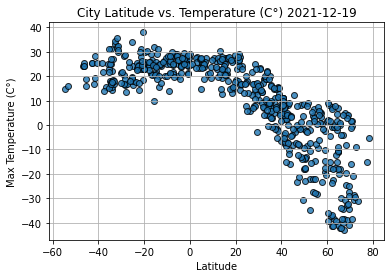

In [255]:
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title(f"City Latitude vs. Temperature (C°) {analysis_date}")
plt.grid()
plt.savefig("WeatherPy/Images/City Latitude vs. Temperature (C°).png")

## Latitude vs. Humidity Plot

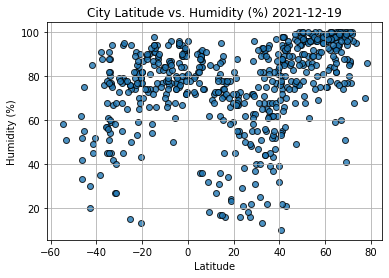

In [256]:
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (%) {analysis_date}")
plt.grid()
plt.savefig("WeatherPy/Images/City Latitude vs. Humidity (%).png")

## Latitude vs. Cloudiness Plot

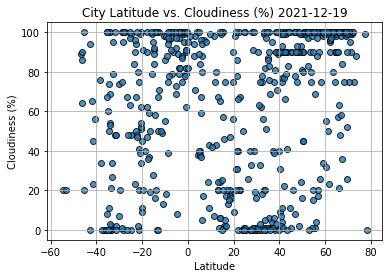

In [257]:
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (%) {analysis_date}")
plt.grid()
plt.savefig("WeatherPy/Images/City Latitude vs. Cloudiness (%).png")

## Latitude vs. Wind Speed Plot

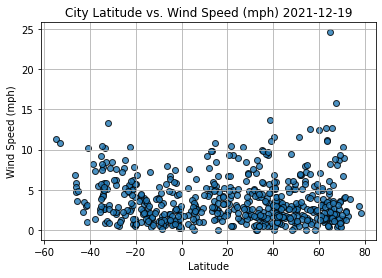

In [258]:
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs. Wind Speed (mph) {analysis_date}")
plt.grid()
plt.savefig("WeatherPy/Images/City Latitude vs. Wind Speed (mph).png")

## Linear Regression

In [247]:
northern_hemisphere = weather_df.loc[(weather_df['Latitude']>0)]
southern_hemisphere = weather_df.loc[(weather_df['Latitude']<0)]

northern_hemisphere_df = pd.DataFrame(northern_hemisphere)
southern_hemisphere_df = pd.DataFrame(southern_hemisphere)

print(northern_hemisphere.count())
northern_hemisphere.head()

Country            376
City               376
Latitude           376
Longitude          376
Date               376
Max Temperature    376
Min Temperature    376
Wind Speed         376
Humidity           376
Cloudiness         376
dtype: int64


,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
0,GB,aberdeen,57.1437,-2.0981,1639872819,3.27,0.67,1.03,100,90
1,US,albany,42.6001,-73.9662,1639872857,2.60,-1.83,0.89,92,100
3,RU,igarka,67.4667,86.5833,1639872857,-38.60,-38.60,2.02,98,36
4,RU,ossora,59.2353,163.0719,1639872858,-19.14,-19.14,3.88,81,34
5,US,college,64.8569,-147.8028,1639872858,-11.03,-13.39,1.54,82,90


In [248]:
print(southern_hemisphere.count())
southern_hemisphere.head()

Country            190
City               190
Latitude           190
Longitude          190
Date               190
Max Temperature    190
Min Temperature    190
Wind Speed         190
Humidity           190
Cloudiness         190
dtype: int64


,Country,City,Latitude,Longitude,Date,Max Temperature,Min Temperature,Wind Speed,Humidity,Cloudiness
2,ID,padang,-0.9492,100.3543,1639872751,24.03,24.03,2.30,91,100
7,CL,ancud,-41.8697,-73.8203,1639872859,16.74,16.74,2.99,85,65
8,MU,mahebourg,-20.4081,57.7000,1639872859,23.47,23.47,0.76,77,51
9,BR,jardim de piranhas,-6.3786,-37.3519,1639872859,29.28,29.28,7.92,50,90
10,TO,vaini,-21.2000,-175.2000,1639872859,31.09,31.09,5.14,84,20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Max Temperature is: -0.81
The r-squared value is: -0.6561000000000001


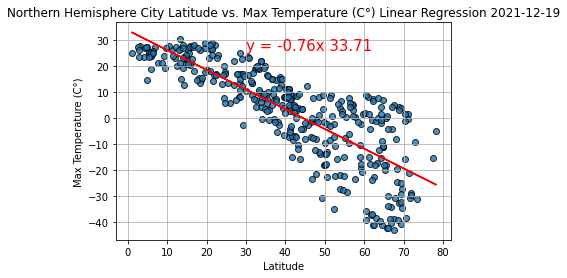

In [259]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title(f"Northern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression {analysis_date}")
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,26),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Max Temperature'])
print(f"The correlation between Northern Hemisphere City Latitude and Max Temperature is: {round(correlation[0],2)}")
print(f"The r-squared value is: {-0.81**2}")

plt.savefig("WeatherPy/Images/Northern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Max Temperature is: 0.26
The r-squared value is: 0.06760000000000001


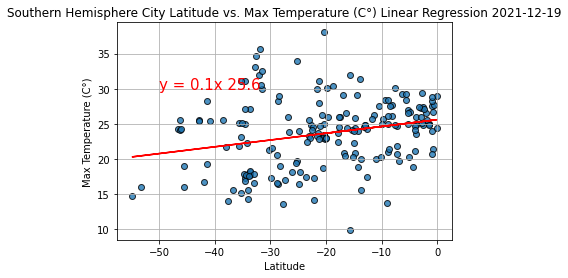

In [260]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Max Temperature'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C°)')
plt.title(f"Southern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression {analysis_date}")
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Max Temperature'])
print(f"The correlation between Southern Hemisphere City Latitude and Max Temperature is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.26**2}")

plt.savefig("WeatherPy/Images/Southern Hemisphere City Latitude vs. Max Temperature (C°) Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Humidity is: 0.46
The r-squared value is: 0.2116


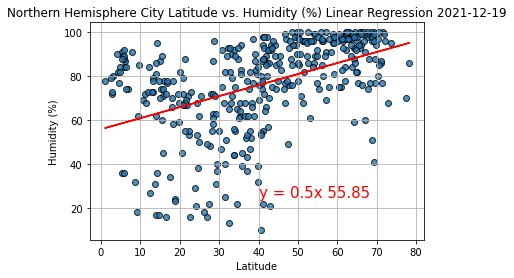

In [261]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Northern Hemisphere City Latitude vs. Humidity (%) Linear Regression {analysis_date}")
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Humidity'])
print(f"The correlation between Northern Hemisphere City Latitude and Humidity is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.46**2}")

plt.savefig("WeatherPy/Images/Northern Hemisphere City Latitude vs. Humidity (%) Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Humidity is: 0.5
The r-squared value is: 0.25


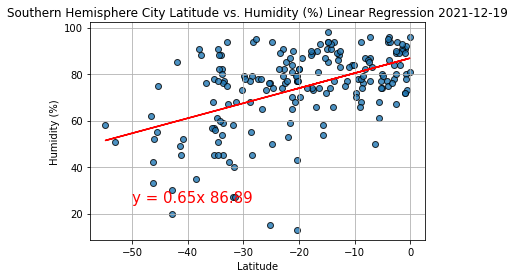

In [262]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Humidity'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Southern Hemisphere City Latitude vs. Humidity (%) Linear Regression {analysis_date}")
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Humidity'])
print(f"The correlation between Southern Hemisphere City Latitude and Humidity is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.5**2}")

plt.savefig("WeatherPy/Images/Southern Hemisphere City Latitude vs. Humidity (%) Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Cloudiness is: 0.37
The r-squared value is: 0.1369


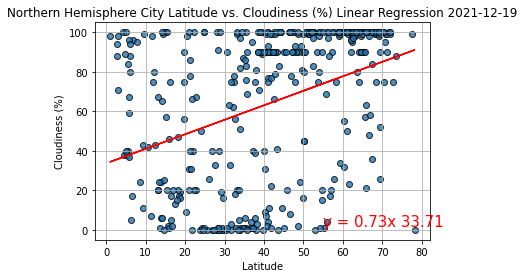

In [263]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression {analysis_date}")
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,2),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Cloudiness'])
print(f"The correlation between Northern Hemisphere City Latitude and Cloudiness is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.37**2}")

plt.savefig("WeatherPy/Images/Northern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Cloudiness is: 0.41
The r-squared value is: 0.16809999999999997


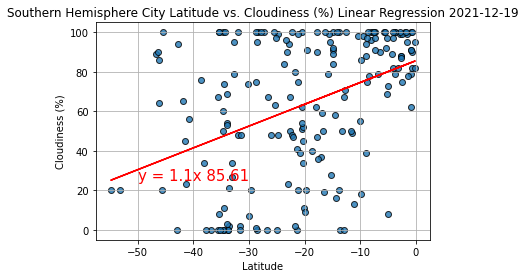

In [264]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Cloudiness'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression {analysis_date}")
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Cloudiness'])
print(f"The correlation between Southern Hemisphere City Latitude and Cloudiness is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.41**2}")

plt.savefig("WeatherPy/Images/Southern Hemisphere City Latitude vs. Cloudiness (%) Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Northern Hemisphere City Latitude and Wind Speed is: 0.01
The r-squared value is: 0.0001


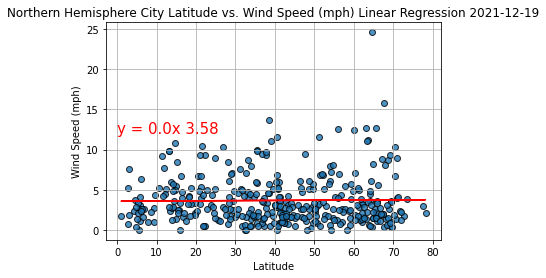

In [265]:
plt.scatter(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression {analysis_date}")
plt.grid()

x_values = northern_hemisphere_df['Latitude']
y_values = northern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")

correlation = st.pearsonr(northern_hemisphere_df['Latitude'],northern_hemisphere_df['Wind Speed'])
print(f"The correlation between Northern Hemisphere City Latitude and Wind Speed is: {round(correlation[0],2)}")
print(f"The r-squared value is: {0.01**2}")

plt.savefig("WeatherPy/Images/Northern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Southern Hemisphere City Latitude and Wind Speed is: -0.45
The r-squared value is: -0.2025


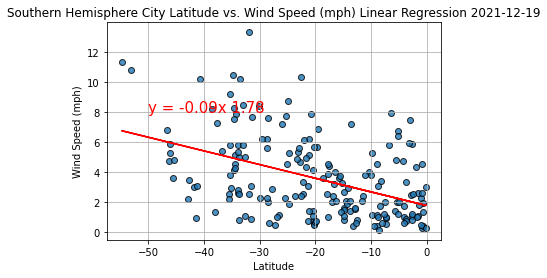

In [266]:
plt.scatter(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Wind Speed'],alpha=0.8,marker="o",edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression {analysis_date}")
plt.grid()

x_values = southern_hemisphere_df['Latitude']
y_values = southern_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")

correlation = st.pearsonr(southern_hemisphere_df['Latitude'],southern_hemisphere_df['Wind Speed'])
print(f"The correlation between Southern Hemisphere City Latitude and Wind Speed is: {round(correlation[0],2)}")
print(f"The r-squared value is: {-0.45**2}")

plt.savefig("WeatherPy/Images/Southern Hemisphere City Latitude vs. Wind Speed (mph) Linear Regression.png")